# Powered by the Earth's Breath
![](https://evcvaluation.com/wp-content/uploads/2019/05/requestvaluationbanner.jpg)
##### By Jeff Akins

#### Imports

In [14]:
import requests
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from env import user_key

In [11]:
#response = requests.get()

In [ ]:
f = h5pyd.File("/nrel/wtk-us.h5", 'r')

In [12]:
wind_df = pd.read_csv('wtk_site_metadata.csv')

In [13]:
wind_df.head()

,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
0,0,-117.147260,23.510410,Unknown,Unknown,1.0,offshore,16,6.07,0.169,0,0/0.nc
1,1,-93.946777,24.007446,Unknown,Unknown,1.0,offshore,16,7.43,0.302,0,0/1.nc
2,2,-97.482483,25.069138,Unknown,Unknown,1.0,offshore,16,8.19,0.375,0,0/2.nc
3,3,-97.463135,25.069443,Unknown,Unknown,1.0,offshore,16,8.19,0.375,0,0/3.nc
4,4,-97.443756,25.069763,Unknown,Unknown,1.0,offshore,16,8.19,0.376,0,0/4.nc


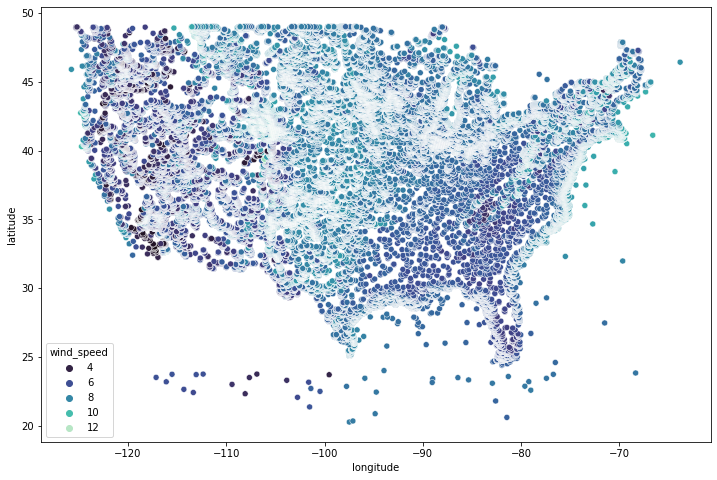

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='wind_speed', palette="mako", data=wind_df)
plt.show()

In [22]:
f = h5pyd.File("/nrel/wtk-us.h5", 'r')

In [24]:
f

<HDF5 file "wtk-us.h5" (mode r)>

In [25]:
list(f)

['inversemoninobukhovlength_2m',
 'status',
 'windspeed_10m',
 'temperature_80m',
 'temperature_160m',
 'temperature_200m',
 'pressure_200m',
 'DIF',
 'temperature_10m',
 'winddirection_120m',
 'windspeed_120m',
 'windspeed_140m',
 'temperature_60m',
 'relativehumidity_2m',
 'windspeed_200m',
 'temperature_140m',
 'precipitationrate_0m',
 'winddirection_160m',
 'pressure_0m',
 'GHI',
 'windspeed_80m',
 'winddirection_100m',
 'temperature_2m',
 'temperature_40m',
 'coordinates',
 'winddirection_60m',
 'windspeed_160m',
 'winddirection_40m',
 'winddirection_10m',
 'DNI',
 'winddirection_200m',
 'windspeed_60m',
 'datetime',
 'pressure_100m',
 'windspeed_40m',
 'temperature_120m',
 'windspeed_100m',
 'winddirection_140m',
 'temperature_100m',
 'winddirection_80m']